In [1]:
import os
import shutil
import tempfile
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import gc
import random

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# CONFIG
base_dir = "projectdata/images/100_stratified4fold_1000per_seed3888"
quadrants = ["Q1", "Q2", "Q3", "Q4"]
img_size = (224, 224)
batch_size = 32
epochs = 30

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Set GPU memory growth
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"Found {len(gpus)} GPU devices and enabled memory growth")
    except RuntimeError as e:
        print(f"GPU setup error: {e}")
        

SEED = 3888
def set_seed(seed=3888):
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    
set_seed(SEED)


Found 1 GPU devices and enabled memory growth



=== Fold 1: Testing on Q1 ===
Found 3196 images belonging to 3 classes.
Found 1050 images belonging to 3 classes.
80134624/80134624 [==============================] - 7s 0us/step
Epoch 1/30
100/100 [==============================] - 88s 758ms/step - loss: 0.6919 - accuracy: 0.6749 - val_loss: 0.4869 - val_accuracy: 0.7724
Epoch 2/30
100/100 [==============================] - 61s 612ms/step - loss: 0.5210 - accuracy: 0.7685 - val_loss: 0.4551 - val_accuracy: 0.7800
Epoch 3/30
100/100 [==============================] - 61s 611ms/step - loss: 0.4930 - accuracy: 0.7804 - val_loss: 0.4318 - val_accuracy: 0.8019
Epoch 4/30
100/100 [==============================] - 61s 609ms/step - loss: 0.4756 - accuracy: 0.7938 - val_loss: 0.4269 - val_accuracy: 0.7981
Epoch 5/30
100/100 [==============================] - 61s 612ms/step - loss: 0.4658 - accuracy: 0.7969 - val_loss: 0.4187 - val_accuracy: 0.8114
Epoch 6/30
100/100 [==============================] - 61s 611ms/step - loss: 0.4699 - accuracy:

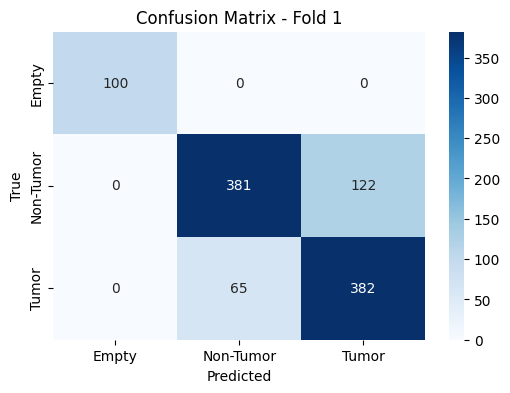

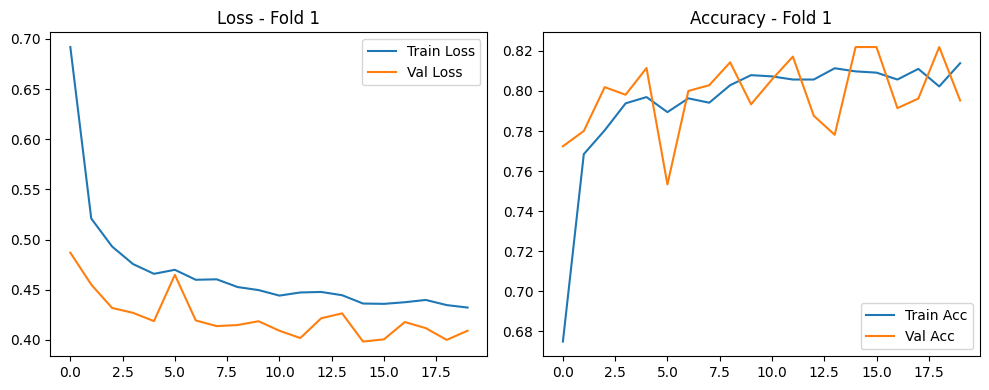


=== Fold 2: Testing on Q2 ===
Found 3256 images belonging to 3 classes.
Found 990 images belonging to 3 classes.
Epoch 1/30
102/102 [==============================] - 66s 642ms/step - loss: 0.7207 - accuracy: 0.6511 - val_loss: 0.4419 - val_accuracy: 0.8273
Epoch 2/30
102/102 [==============================] - 57s 563ms/step - loss: 0.5346 - accuracy: 0.7558 - val_loss: 0.4074 - val_accuracy: 0.8343
Epoch 3/30
102/102 [==============================] - 57s 555ms/step - loss: 0.5063 - accuracy: 0.7730 - val_loss: 0.3989 - val_accuracy: 0.8313
Epoch 4/30
102/102 [==============================] - 56s 549ms/step - loss: 0.4982 - accuracy: 0.7841 - val_loss: 0.3931 - val_accuracy: 0.8273
Epoch 5/30
102/102 [==============================] - 56s 549ms/step - loss: 0.4869 - accuracy: 0.7783 - val_loss: 0.3899 - val_accuracy: 0.8323
Epoch 6/30
102/102 [==============================] - 50s 493ms/step - loss: 0.4780 - accuracy: 0.7859 - val_loss: 0.3815 - val_accuracy: 0.8414
Epoch 7/30
102/1

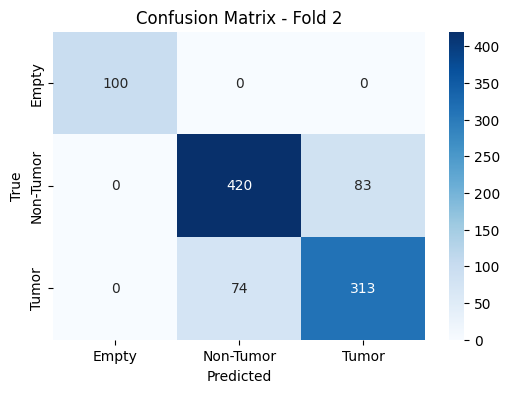

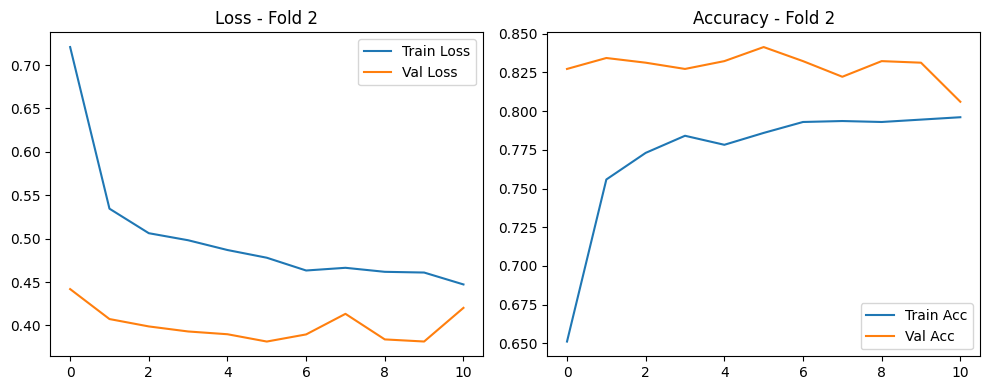


=== Fold 3: Testing on Q3 ===
Found 3143 images belonging to 3 classes.
Found 1103 images belonging to 3 classes.
Epoch 1/30
99/99 [==============================] - 62s 602ms/step - loss: 0.6969 - accuracy: 0.6545 - val_loss: 0.5552 - val_accuracy: 0.7353
Epoch 2/30
99/99 [==============================] - 57s 574ms/step - loss: 0.4948 - accuracy: 0.7856 - val_loss: 0.5097 - val_accuracy: 0.7498
Epoch 3/30
99/99 [==============================] - 50s 501ms/step - loss: 0.4698 - accuracy: 0.7970 - val_loss: 0.5040 - val_accuracy: 0.7543
Epoch 4/30
99/99 [==============================] - 46s 463ms/step - loss: 0.4646 - accuracy: 0.8005 - val_loss: 0.5160 - val_accuracy: 0.7425
Epoch 5/30
99/99 [==============================] - 46s 465ms/step - loss: 0.4527 - accuracy: 0.8027 - val_loss: 0.5451 - val_accuracy: 0.7244
Epoch 6/30
99/99 [==============================] - 47s 472ms/step - loss: 0.4468 - accuracy: 0.8069 - val_loss: 0.5098 - val_accuracy: 0.7498
Epoch 7/30
99/99 [=========

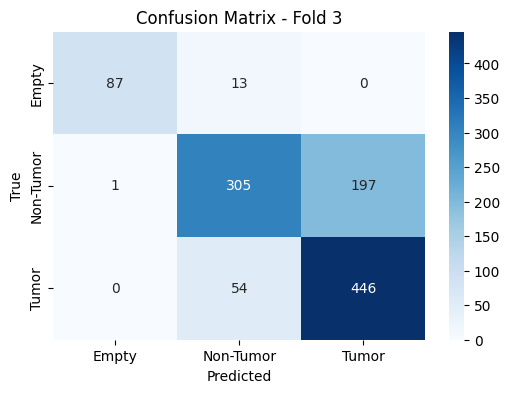

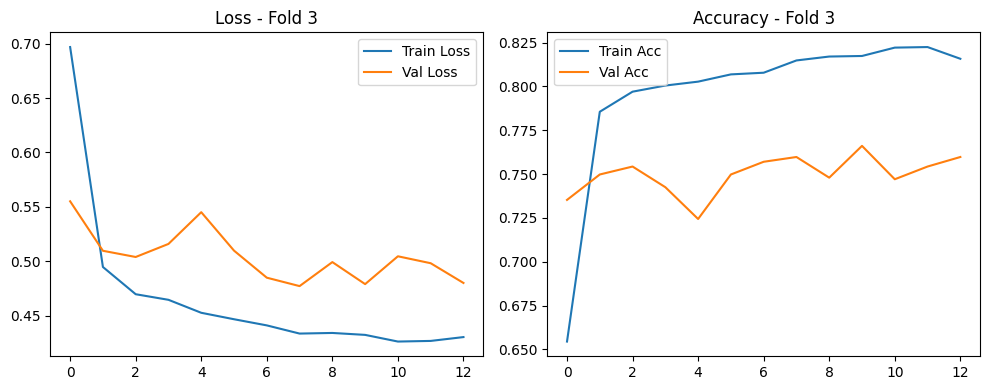


=== Fold 4: Testing on Q4 ===
Found 3143 images belonging to 3 classes.
Found 1103 images belonging to 3 classes.
Epoch 1/30
99/99 [==============================] - 55s 553ms/step - loss: 0.6955 - accuracy: 0.6421 - val_loss: 0.5554 - val_accuracy: 0.7489
Epoch 2/30
99/99 [==============================] - 54s 546ms/step - loss: 0.4961 - accuracy: 0.7706 - val_loss: 0.5315 - val_accuracy: 0.7679
Epoch 3/30
99/99 [==============================] - 54s 545ms/step - loss: 0.4585 - accuracy: 0.7906 - val_loss: 0.5565 - val_accuracy: 0.7715
Epoch 4/30
99/99 [==============================] - 54s 548ms/step - loss: 0.4527 - accuracy: 0.7957 - val_loss: 0.5147 - val_accuracy: 0.7851
Epoch 5/30
99/99 [==============================] - 54s 543ms/step - loss: 0.4420 - accuracy: 0.8043 - val_loss: 0.5337 - val_accuracy: 0.7897
Epoch 6/30
99/99 [==============================] - 56s 562ms/step - loss: 0.4331 - accuracy: 0.8050 - val_loss: 0.5012 - val_accuracy: 0.7960
Epoch 7/30
99/99 [=========

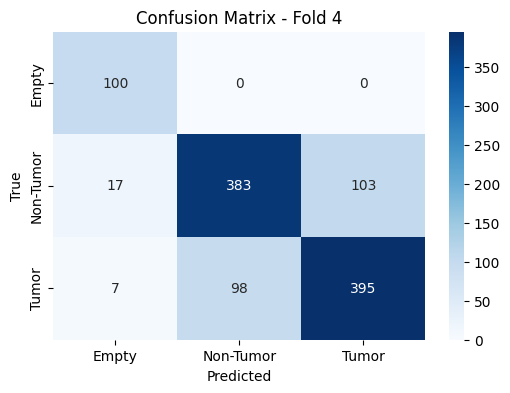

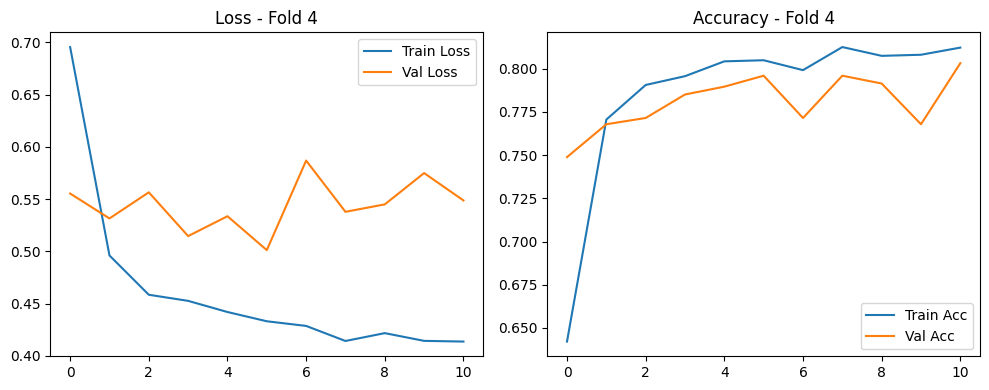


Best model saved as 'best_model_VGG19.h5'

=== Final Cross-Validation Accuracy: 0.8082 ===

Average Classification Accuracy per Fold:
   accuracy
0  0.821905
1  0.841414
2  0.759746
3  0.796011


In [ ]:

# Image Generators
set_seed(SEED)
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, rotation_range=10, zoom_range=0.1)
test_datagen = ImageDataGenerator(rescale=1./255)

# Merge training folders for each fold
def merge_training_dirs(train_dirs):
    temp_dir = tempfile.mkdtemp()
    class_names = ['Empty', 'Non-Tumor', 'Tumor']
    for class_name in class_names:
        os.makedirs(os.path.join(temp_dir, class_name), exist_ok=True)
    for train_dir in train_dirs:
        for class_name in class_names:
            src_dir = os.path.join(train_dir, class_name)
            dst_dir = os.path.join(temp_dir, class_name)
            for file in os.listdir(src_dir):
                shutil.copy(os.path.join(src_dir, file), dst_dir)
    return temp_dir

# Build the CNN model using VGG19
def build_model():
    K.clear_session()
    set_seed(SEED)
    
    base = VGG19(include_top=False, input_shape=(*img_size, 3), weights='imagenet')
    base.trainable = False  # Freeze base layers

    x = base.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(3, activation='softmax')(x)

    model = Model(inputs=base.input, outputs=predictions)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# For collecting fold metrics
all_histories = []
all_reports = []
best_val_loss = float('inf')  # Initialize with an infinitely large number
best_model = None  # To keep track of the best model

for i, test_fold in enumerate(quadrants):
    set_seed(SEED)
    
    print(f"\n=== Fold {i+1}: Testing on {test_fold} ===")
    train_folds = [q for q in quadrants if q != test_fold]
    train_dirs = [os.path.join(base_dir, fold) for fold in train_folds]
    valid_dir = os.path.join(base_dir, test_fold)

    merged_train_dir = merge_training_dirs(train_dirs)

    train_generator = train_datagen.flow_from_directory(
        merged_train_dir, target_size=img_size, batch_size=batch_size,
        class_mode='categorical'
    )

    val_generator = test_datagen.flow_from_directory(
        valid_dir, target_size=img_size, batch_size=batch_size,
        class_mode='categorical', shuffle=False
    )

    model = build_model()

    callbacks = [
        EarlyStopping(patience=5, restore_best_weights=True, monitor='val_loss'),
        ModelCheckpoint(f'VGG19_fold_{i+1}.h5', save_best_only=True, monitor='val_loss')
    ]

    history = model.fit(train_generator, epochs=epochs, validation_data=val_generator, callbacks=callbacks)
    all_histories.append(history.history)

    # Predict and evaluate
    val_preds = model.predict(val_generator)
    y_pred = np.argmax(val_preds, axis=1)
    y_true = val_generator.classes
    class_labels = list(val_generator.class_indices.keys())

    print(f"Classification Report for Fold {i+1}:")
    report = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)
    all_reports.append(report)
    print(classification_report(y_true, y_pred, target_names=class_labels))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
    plt.title(f'Confusion Matrix - Fold {i+1}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Save the best model after each fold (check for better validation loss)
    fold_val_loss = min(history.history['val_loss'])
    if fold_val_loss < best_val_loss:
        best_val_loss = fold_val_loss
        best_model = model

    # Plot Loss/Accuracy
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'Loss - Fold {i+1}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'Accuracy - Fold {i+1}')
    plt.legend()
    plt.tight_layout()
    plt.show()
    K.clear_session()
    gc.collect()

# Save the best model after cross-validation
if best_model:
    best_model.save('best_model_VGG19.h5')
    print("\nBest model saved as 'best_model_VGG19.h5'")

# Average metrics over folds
avg_accuracy = np.mean([max(hist['val_accuracy']) for hist in all_histories])
print(f"\n=== Final Cross-Validation Accuracy: {avg_accuracy:.4f} ===")

# (Optional) Average classification report
import pandas as pd
df_reports = pd.DataFrame([r['accuracy'] for r in all_reports], columns=['accuracy'])
print("\nAverage Classification Accuracy per Fold:")
print(df_reports)
